## **``PANDAS``**

##### **HARDEST Functions**

**https://towardsdatascience.com/meet-the-hardest-functions-of-pandas-part-i-7d1f74597e92**

**https://towardsdatascience.com/meet-the-hardest-functions-of-pandas-part-ii-f8029a2b0c9b**

**https://towardsdatascience.com/shape-tables-like-jelly-with-pandas-melt-and-pivot-f2e13e666d6**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = ((1,'raja','ram'),
        (2,'ramu','jaimu'),
        (3,'deepu','mastana'))

In [3]:
data

((1, 'raja', 'ram'), (2, 'ramu', 'jaimu'), (3, 'deepu', 'mastana'))

In [4]:
data = pd.DataFrame(data,columns=['num','f_name','l_name'])

In [5]:
data.to_excel('excel1.xlsx',sheet_name='data',encoding='unicode',index=False)

In [6]:
tips_df = sns.load_dataset('tips')

In [7]:
tips_df.shape

(244, 7)

In [8]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


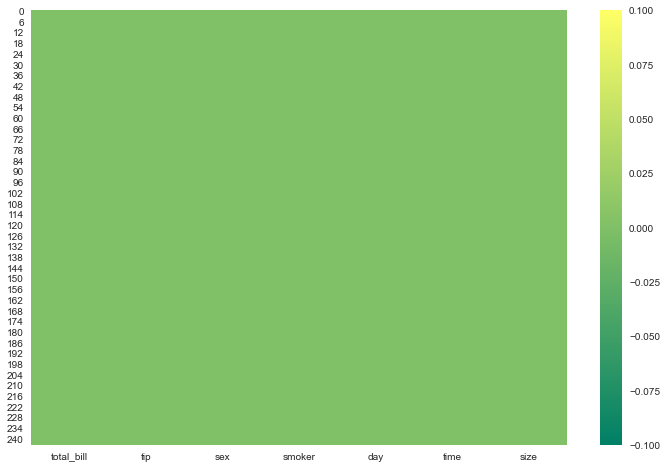

In [10]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12,8))
    sns.heatmap(tips_df.isnull(),annot=False,cmap='summer',cbar=True)
    plt.show()

In [11]:
tips_df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [12]:
%%timeit
tips_df.groupby(['sex']).count()[['total_bill']]

10.6 ms ± 2.76 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
tips_df.groupby(['sex'])[['total_bill']].count()

4.94 ms ± 951 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
tips_df.groupby(['sex'])[['total_bill']].sum()

,total_bill
sex,
Male,3256.82
Female,1570.95


In [15]:
tips_df.groupby(['sex','smoker']).count()

total_bill  tip  day  time  size
sex    smoker                                  
Male   Yes             60   60   60    60    60
       No              97   97   97    97    97
Female Yes             33   33   33    33    33
       No              54   54   54    54    54

In [16]:
%%timeit
tips_df.pivot_table(values='total_bill',index='sex',aggfunc=np.count_nonzero)

25.3 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
tips_df.pivot_table(values='total_bill',index='sex',aggfunc=np.count_nonzero)

,total_bill
sex,
Male,157.0
Female,87.0


In [18]:
tips_df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [19]:
tips_df.groupby(['sex','smoker'])[['total_bill']].agg([np.mean,np.median,np.sum])

total_bill                
                    mean median      sum
sex    smoker                           
Male   Yes     22.284500  20.39  1337.07
       No      19.791237  18.24  1919.75
Female Yes     17.977879  16.27   593.27
       No      18.105185  16.69   977.68

In [20]:
tips_df.pivot_table(values=['total_bill','tip'],index=['sex','smoker'],aggfunc=[np.mean,np.median,np.sum])

mean            median                sum           
                    tip total_bill    tip total_bill     tip total_bill
sex    smoker                                                          
Male   Yes     3.051167  22.284500   3.00      20.39  183.07    1337.07
       No      3.113402  19.791237   2.74      18.24  302.00    1919.75
Female Yes     2.931515  17.977879   2.88      16.27   96.74     593.27
       No      2.773519  18.105185   2.68      16.69  149.77     977.68

In [21]:
tips_df.pivot_table(values=['tip'],columns=['size'],index=['sex','smoker'],aggfunc=[np.mean,np.sum],fill_value=0)

mean                                             sum          \
                 tip                                             tip           
size               1         2         3         4     5     6     1       2   
sex    smoker                                                                  
Male   Yes     1.920  2.692927  4.272857  3.981111  2.50  0.00  1.92  110.41   
       No      0.000  2.557544  3.148824  4.262632  5.00  5.85  0.00  145.78   
Female Yes     1.000  2.736800  3.846000  4.045000  0.00  0.00  1.00   68.42   
       No      1.415  2.370606  2.918889  4.014286  5.14  4.60  2.83   78.23   

                                          
                                          
size               3      4      5     6  
sex    smoker                             
Male   Yes     29.91  35.83   5.00   0.0  
       No      53.53  80.99  10.00  11.7  
Female Yes     19.23   8.09   0.00   0.0  
       No      26.27  28.10   5.14   9.2

In [22]:
arithmetic_results = tips_df.pivot_table(values=['total_bill','tip'],index=['sex'],aggfunc={'total_bill':np.sum,
                                                                       'tip':[np.mean,np.median,np.max,np.min]})
arithmetic_results

tip                       total_bill
        amax amin      mean median        sum
sex                                          
Male    10.0  1.0  3.089618   3.00    3256.82
Female   6.5  1.0  2.833448   2.75    1570.95

In [23]:
arithmetic_results.stack()

tip  total_bill
sex                                 
Male   amax    10.000000         NaN
       amin     1.000000         NaN
       mean     3.089618         NaN
       median   3.000000         NaN
       sum           NaN     3256.82
Female amax     6.500000         NaN
       amin     1.000000         NaN
       mean     2.833448         NaN
       median   2.750000         NaN
       sum           NaN     1570.95

In [24]:
arithmetic_results.stack(level=0)

amax  amin      mean  median      sum
sex                                                     
Male   tip         10.0   1.0  3.089618    3.00      NaN
       total_bill   NaN   NaN       NaN     NaN  3256.82
Female tip          6.5   1.0  2.833448    2.75      NaN
       total_bill   NaN   NaN       NaN     NaN  1570.95

In [25]:
arithmetic_results

tip                       total_bill
        amax amin      mean median        sum
sex                                          
Male    10.0  1.0  3.089618   3.00    3256.82
Female   6.5  1.0  2.833448   2.75    1570.95

In [26]:
pd.DataFrame(arithmetic_results.unstack())

0
                  sex                
tip        amax   Male      10.000000
                  Female     6.500000
           amin   Male       1.000000
                  Female     1.000000
           mean   Male       3.089618
                  Female     2.833448
           median Male       3.000000
                  Female     2.750000
total_bill sum    Male    3256.820000
                  Female  1570.950000

In [27]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
pd.crosstab(index=tips_df['sex'],columns=tips_df['smoker'],values=tips_df['tip'],aggfunc=np.mean)

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [29]:
tips_df.pivot_table(values='tip',index='sex',columns='smoker',aggfunc=np.mean)

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [30]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
pd.melt(frame=tips_df,id_vars='time',value_vars=['size','tip'])

,time,variable,value
0,Dinner,size,2.00
1,Dinner,size,3.00
2,Dinner,size,3.00
3,Dinner,size,2.00
4,Dinner,size,4.00
...,...,...,...
483,Dinner,tip,5.92
484,Dinner,tip,2.00
485,Dinner,tip,2.00
486,Dinner,tip,1.75


In [13]:
df = pd.DataFrame({'Id':[1,2,3,4],'val':[2,5,np.nan,6]})

In [14]:
df

,Id,val
0,1,2.0
1,2,5.0
2,3,NaN
3,4,6.0


In [17]:
df[df['val'] != np.nan]

,Id,val
0,1,2.0
1,2,5.0
2,3,NaN
3,4,6.0


In [19]:
df['val'].isna()

0    False
1    False
2     True
3    False
Name: val, dtype: bool

In [21]:
np.nan != np.nan

True

In [33]:
df['Id'].index=['A1','A2','A3','A4']

In [34]:
df['Id']

A1    1
A2    2
A3    3
A4    4
Name: Id, dtype: int64

In [35]:
df['val']

0    2.0
1    5.0
2    NaN
3    6.0
Name: val, dtype: float64

In [38]:
pd.concat([df['Id'],df['val']],axis=1,ignore_index=False)

,Id,val
A1,1.0,NaN
A2,2.0,NaN
A3,3.0,NaN
A4,4.0,NaN
0,NaN,2.0
1,NaN,5.0
2,NaN,NaN
3,NaN,6.0
